# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type

#print(pyber_data_df)

#pyber_data_df[pyber_data_df]

#pyber_data_df.groupby(["type"]).count()["ride_id"]

#a list of city types
#urban_rides = pyber_data_df.loc[pyber_data_df["type"] == "Urban"]

#urban_rides = urban_rides = pyber_data_df.loc[pyber_data_df["type"] == "Urban"]
#suburban_rides = pyber_data_df.loc[pyber_data_df["type"] == "Suburban"]
#rural_rides = pyber_data_df.loc[pyber_data_df["type"] == "Rural"]
#print(urban_rides.shape[0])


# Group each school Series by the city type for the total rides
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
#suburban_rides_total = pyber_data_df.groupby(["type"]).count()["ride_id"]
#rural_rides_total = pyber_data_df.groupby(["type"]).count()["ride_id"]

print(total_rides)
#print(suburban_rides_total)
#print(rural_rides_total)

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64


In [4]:
# 2. Get the total drivers for each city type

#Group each school Series by the city type for the total driver count
total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]
#suburban_rides_total = suburban_rides.groupby(["type"]).sum()["Total Drivers"]
#rural_rides_total = rural_rides.groupby(["type"]).sum()["Total Drivers"]

print(total_drivers)

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64


In [5]:
#  3. Get the total amount of fares for each city type


fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
#rural_rides_total = rural_rides.groupby(["type"]).sum()["Total Fares"]

print(fare_total)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


In [6]:
#  4. Get the average fare per ride for each city type. 
# Group each school Series by the city type for the total driver count
total_ridefare_average = (fare_total/ total_rides)
#suburban_rides_total = suburban_rides.groupby(["type"]).avg()["Average Fare per Ride"]
#rural_rides_total = rural_rides.groupby(["type"]).avg()["Average Fare per Ride"]
print(total_ridefare_average)

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64


In [7]:
# 5. Get the average fare per driver for each city type. 

total_driverfare_average = (fare_total/ total_drivers)
#suburban_rides_total = suburban_rides.groupby(["type"],["ride_id"]).avg()["Average Fare per Driver"]
#rural_rides_total = rural_rides.groupby(["type"],["ride_id"]).avg()["Average Fare per Driver"]
print(total_driverfare_average)                                                  

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64


In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_ride_summary_df = pd.DataFrame ({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": fare_total,
    "Average Fare per Ride": total_ridefare_average,
    "Average Fare per Driver": total_driverfare_average
})

pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_ride_summary_df.index.name = None
pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [10]:
#  8. Format the columns.
pyber_ride_summary_df["Total Rides"] = pyber_ride_summary_df["Total Rides"].map("{:}".format)
pyber_ride_summary_df["Total Drivers"] = pyber_ride_summary_df["Total Drivers"].map("{:}".format)
pyber_ride_summary_df["Total Fares"] = pyber_ride_summary_df["Total Fares"].map("${:.2f}".format)
pyber_ride_summary_df["Average Fare per Ride"] = pyber_ride_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_ride_summary_df["Average Fare per Driver"] = pyber_ride_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_ride_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,$4327.93,$34.62,$8.06
Suburban,625,8570,$19356.33,$30.97,$2.26
Urban,1625,59602,$39854.38,$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [12]:
# 1. Read the merged DataFrame
citytype_ridefare = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]

citytype_ridefare

fare
type  date                  
Rural 1/1/2019 9:45    43.69
      1/11/2019 4:39   16.42
      1/14/2019 15:58  54.10
      1/14/2019 7:09   18.05
      1/15/2019 21:44  30.26
...                      ...
Urban 5/8/2019 1:54    32.69
      5/8/2019 2:31    41.33
      5/8/2019 4:20    21.99
      5/8/2019 4:39    18.45
      5/8/2019 7:29    18.55

[2364 rows x 1 columns]

In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#for each date where the indices are the city type and date.

#ride_fare_summary_df = pd.DataFrame ({
   # "type": citytype_ridefare,
   # "date": citytype_ridefare,
   # "fare": citytype_ridefare,
   # })

#ride_fare_summary_df

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
citytype_ridefare = citytype_ridefare.reset_index()
citytype_ridefare.head(10)

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
5,Rural,1/18/2019 0:46,15.12
6,Rural,1/18/2019 7:36,43.57
7,Rural,1/19/2019 11:40,49.44
8,Rural,1/19/2019 12:38,38.68
9,Rural,1/19/2019 20:21,56.78


In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
citytype_ridefare_pivot = citytype_ridefare.pivot(index="date", columns="type", values="fare")
citytype_ridefare_pivot.tail()

type,Rural,Suburban,Urban
date,,,
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99
5/8/2019 4:39,NaN,NaN,18.45
5/8/2019 7:29,NaN,NaN,18.55


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

#citytype_ridefare_pivot_dates = citytype_ridefare_pivot.loc[citytype_ridefare_pivot["date"] == "2019-01-01" : "2019-04-28"]

citytype_ridefare_pivot_dates = citytype_ridefare_pivot.loc['2019-01-01':'2019-04-28']


citytype_ridefare_pivot_dates.tail()

type,Rural,Suburban,Urban
date,,,


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

citytype_ridefare_pivot.index = pd.to_datetime(citytype_ridefare_pivot.index)

citytype_ridefare_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
2019-01-01 14:52:00,NaN,31.15,NaN
2019-01-01 17:22:00,NaN,NaN,42.11
2019-01-01 21:04:00,NaN,NaN,11.71
2019-01-01 02:07:00,NaN,24.07,NaN


In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
citytype_ridefare_pivot.index = pd.to_datetime(citytype_ridefare_pivot.index)

citytype_ridefare_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = citytype_ridefare_pivot.resample("W").sum()
weekly_fares_df.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29
2019-05-05,257.42,1164.78,2178.57
2019-05-12,156.82,308.21,610.03


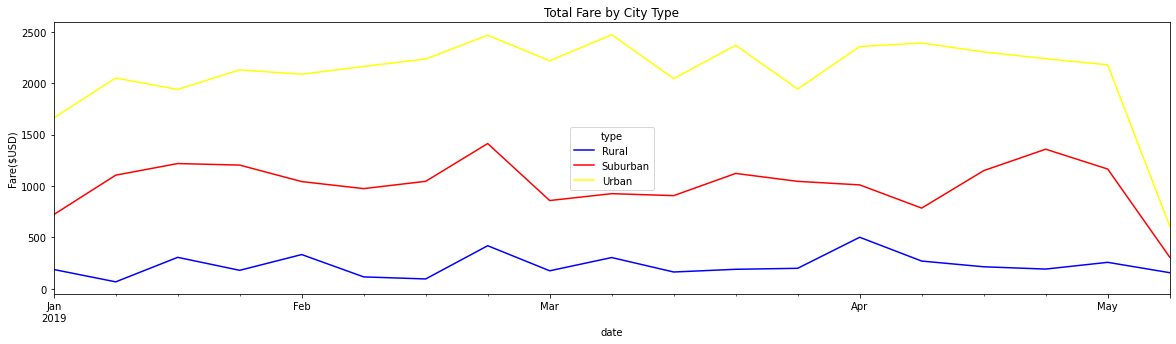

In [20]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

weekly_fares = weekly_fares_df.plot(figsize = (20,5), color = ["blue", "red", "yellow"])
weekly_fares.set_title("Total Fare by City Type")
weekly_fares.set_ylabel("Fare($USD)")
#weekly_fares.set_xlabel(citytype_ridefare_pivot_dates)

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.savefig("Total_Fare_by_City_Type.png", bbox_inches = "tight")
